In [1]:
import sys
import os

os.chdir("../")

os.getcwd()


'c:\\Users\\dukuku1\\OneDrive - Louisiana State University\\Documents\\LSU\\Classes\\2nd year\\Spring\\Che 7700\\Project\\ezyzip (1)'

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from xgboost.callback import TrainingCallback
import matplotlib.pyplot as plt
from src.data_preprocess_xgboost import Preprocess

In [3]:
save_path = 'plots'  
file_path = "data/Load_data_new.csv"

data = Preprocess(file_path)
X_train_electricity, X_test_electricity, y_train_electricity, y_test_electricity,X_train_heat, X_test_heat, y_train_heat, y_test_heat=data.load_and_preprocess_data()
from model.xgboost_model import XGBoostModel

model = XGBoostModel(file_path)




In [4]:
trained_model_electricity = model.train_model_electricity()
trained_model_heat = model.train_model_heat()

Iteration 0:
  Train R²: 0.0018, Train MSE: 56812.0157
  Test R²: 0.0007, Test MSE: 58335.1151
Iteration 10:
  Train R²: 0.0446, Train MSE: 54375.4171
  Test R²: 0.0355, Test MSE: 56307.9168
Iteration 20:
  Train R²: 0.0667, Train MSE: 53116.8480
  Test R²: 0.0519, Test MSE: 55347.2701
Iteration 30:
  Train R²: 0.0749, Train MSE: 52648.4138
  Test R²: 0.0546, Test MSE: 55189.9950
Iteration 40:
  Train R²: 0.0807, Train MSE: 52320.4130
  Test R²: 0.0554, Test MSE: 55141.7878
Iteration 50:
  Train R²: 0.0865, Train MSE: 51987.2229
  Test R²: 0.0556, Test MSE: 55133.7687
Iteration 60:
  Train R²: 0.0914, Train MSE: 51712.9004
  Test R²: 0.0549, Test MSE: 55174.7585
Iteration 70:
  Train R²: 0.0967, Train MSE: 51407.1184
  Test R²: 0.0546, Test MSE: 55192.2769
Iteration 80:
  Train R²: 0.1018, Train MSE: 51116.4834
  Test R²: 0.0544, Test MSE: 55200.9819
Iteration 90:
  Train R²: 0.1064, Train MSE: 50858.7720
  Test R²: 0.0541, Test MSE: 55220.0905
Iteration 0:
  Train R²: 0.0009, Train MS

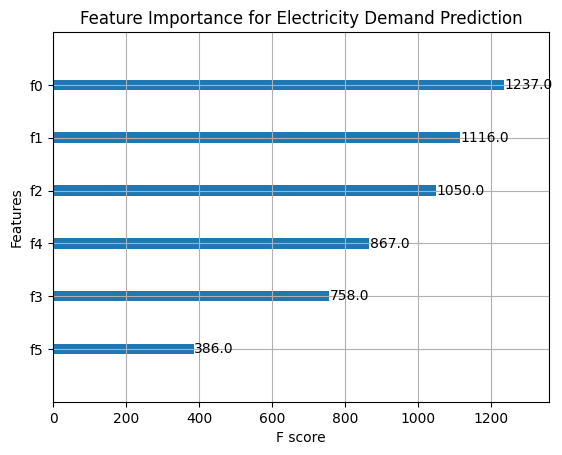

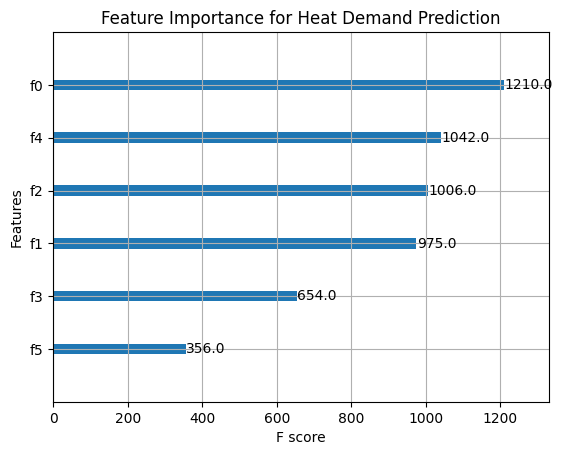

In [5]:

xgb.plot_importance(trained_model_electricity, importance_type='weight')
plt.title('Feature Importance for Electricity Demand Prediction')
plt.show()

# Plot feature importance for heat demand

xgb.plot_importance(trained_model_heat, importance_type='weight')
plt.title('Feature Importance for Heat Demand Prediction')
plt.show()

In [6]:
feature_names = ['air_pressure[mmHg]', 'air_temperature[degree celcius]',
       'relative_humidity[%]', 'wind_speed[M/S]', 'solar_irridiation[W/m²]',
       'total_cloud_cover[from ten]'] 


# Clean up feature names: remove special characters like [ and ]
sanitized_feature_names = [name.replace('[', '').replace(']', '').replace('<', '').strip()
                           for name in feature_names]

f0 ➝ air_pressuremmHg
f1 ➝ air_temperaturedegree celcius
f2 ➝ relative_humidity%
f3 ➝ wind_speedM/S
f4 ➝ solar_irridiationW/m²
f5 ➝ total_cloud_coverfrom ten


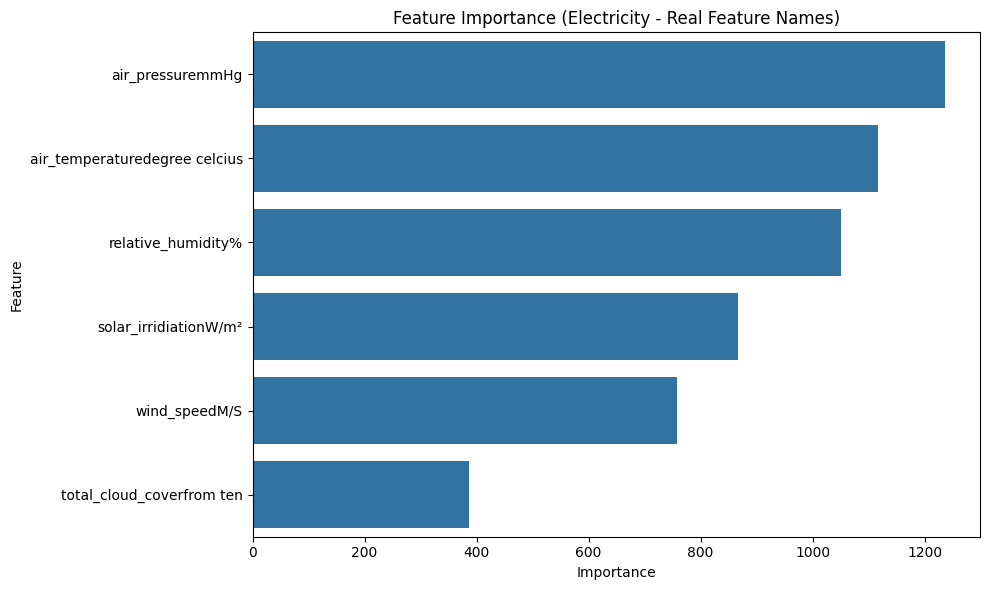

In [7]:

X_train_elec = pd.DataFrame(X_train_electricity, columns=sanitized_feature_names)
X_test_elec = pd.DataFrame(X_test_electricity, columns=sanitized_feature_names)

for i, name in enumerate(sanitized_feature_names):
    print(f"f{i} ➝ {name}")
# Get raw importance
importance_dict = trained_model_electricity .get_score(importance_type='weight')

# Replace keys: 'f0', 'f1', ... with actual names
mapped_importance = {sanitized_feature_names[int(k[1:])]: v for k, v in importance_dict.items()}

import seaborn as sns

# Convert to DataFrame and sort
importance_df = pd.DataFrame({
    'Feature': list(mapped_importance.keys()),
    'Importance': list(mapped_importance.values())
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance (Electricity - Real Feature Names)')
plt.tight_layout()
plt.savefig(os.path.join(save_path, 'Feature_Importance_Electricity.png'))
plt.show()


f0 ➝ air_pressuremmHg
f1 ➝ air_temperaturedegree celcius
f2 ➝ relative_humidity%
f3 ➝ wind_speedM/S
f4 ➝ solar_irridiationW/m²
f5 ➝ total_cloud_coverfrom ten


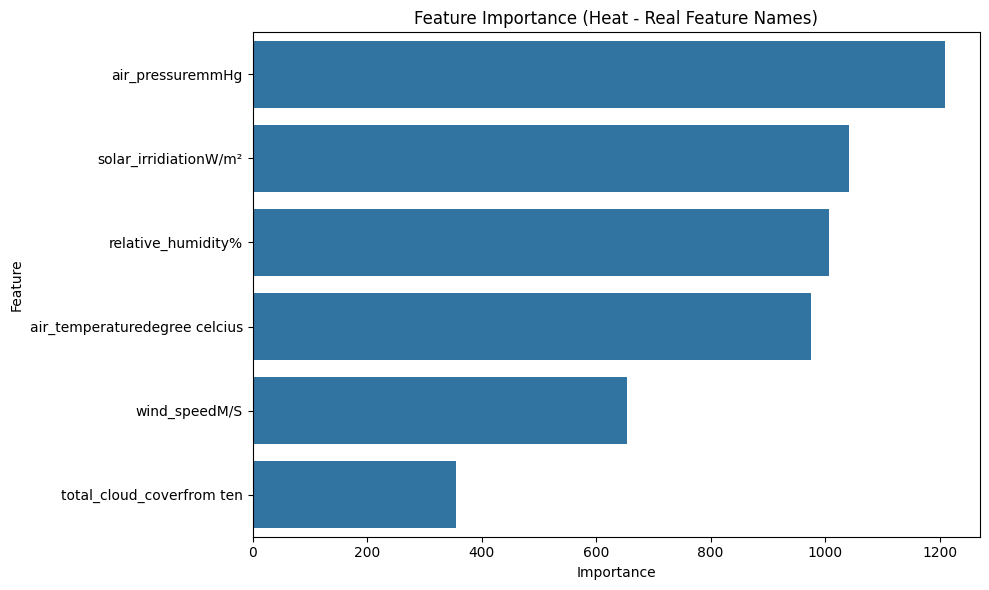

In [8]:
X_train_h = pd.DataFrame(X_train_heat, columns=sanitized_feature_names)
X_test_h = pd.DataFrame(X_test_heat, columns=sanitized_feature_names)

for i, name in enumerate(sanitized_feature_names):
    print(f"f{i} ➝ {name}")
# Get raw importance
importance_dict_h = trained_model_heat.get_score(importance_type='weight')

# Replace keys: 'f0', 'f1', ... with actual names
mapped_importance_h = {sanitized_feature_names[int(k[1:])]: v for k, v in importance_dict_h.items()}

import seaborn as sns

# Convert to DataFrame and sort
importance_df_h = pd.DataFrame({
    'Feature': list(mapped_importance_h.keys()),
    'Importance': list(mapped_importance_h.values())
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df_h, x='Importance', y='Feature')
plt.title('Feature Importance (Heat - Real Feature Names)')
plt.tight_layout()
plt.savefig(os.path.join(save_path, 'Feature_Importance_Heat.png'))
plt.show()
